## 1.Dataset Justification

The Fashion-MNIST dataset is well suited for convolutional neural networks because it consists of image-based data with clear spatial structure. Each image represents a clothing item where local visual features such as edges, contours, and shapes are essential for correct classification.

Convolutional layers are particularly effective at capturing these local patterns through shared filters and spatial hierarchies, making CNNs more appropriate than fully connected networks for this task. Additionally, the dataset contains multiple balanced classes and uniform image dimensions, which facilitates efficient training and evaluation of convolutional models.

In [ ]:
%pip install numpy pandas matplotlib tensorflow

In [2]:
import tensorflow as tf

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print basic information
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


Training samples: 60000
Test samples: 10000
Number of classes: 10
Image dimensions: (28, 28) (height, width)
Channels: 1 (grayscale)

Class distribution (training set):
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

After preprocessing:
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


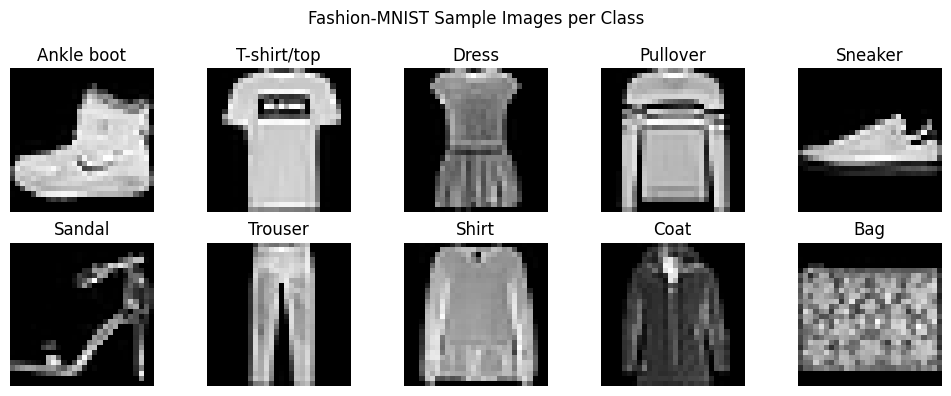

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# -------------------------
# Dataset size
# -------------------------
print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])
print("Number of classes:", len(class_names))

# -------------------------
# Image dimensions and channels
# -------------------------
print("Image dimensions:", x_train.shape[1:], "(height, width)")
print("Channels: 1 (grayscale)")

# -------------------------
# Class distribution
# -------------------------
unique, counts = np.unique(y_train, return_counts=True)
print("\nClass distribution (training set):")
for u, c in zip(unique, counts):
    print(f"{class_names[u]}: {c}")

# -------------------------
# Preprocessing
# -------------------------
# Normalize pixel values to [0,1]
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Add channel dimension for CNN input
x_train_norm = x_train_norm[..., np.newaxis]
x_test_norm = x_test_norm[..., np.newaxis]

print("\nAfter preprocessing:")
print("Training data shape:", x_train_norm.shape)
print("Test data shape:", x_test_norm.shape)

# -------------------------
# Sample images per class
# -------------------------
plt.figure(figsize=(10, 4))
plt.suptitle("Fashion-MNIST Sample Images per Class")

shown_classes = set()
i = 0

while len(shown_classes) < 10:
    label = y_train[i]
    if label not in shown_classes:
        plt.subplot(2, 5, len(shown_classes) + 1)
        plt.imshow(x_train[i], cmap="gray")
        plt.title(class_names[label])
        plt.axis("off")
        shown_classes.add(label)
    i += 1

plt.tight_layout()
plt.show()
